# Importing Necessary Modules

In [ ]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

**Intializing The Dataset**

In [ ]:
rain = pd.read_csv('weatherAUS.csv')
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


**Exploring The Dataset**

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
rain.shape

(145460, 23)

# Data Preprocessing

##**Label Encoding**

In [ ]:
categorical_col, contin_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

print(rain.RainToday)
print(rain.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


In [ ]:
rain=rain.iloc[:,1:]
rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [ ]:
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

##**Handling Missing Values**

In [ ]:
rain.nunique()

Location          49
MinTemp          389
MaxTemp          505
Rainfall         681
Evaporation      358
Sunshine         145
WindGustDir       17
WindGustSpeed     67
WindDir9am        17
WindDir3pm        17
WindSpeed9am      43
WindSpeed3pm      44
Humidity9am      101
Humidity3pm      101
Pressure9am      546
Pressure3pm      549
Cloud9am          10
Cloud3pm          10
Temp9am          441
Temp3pm          502
RainToday          2
RainTomorrow       2
dtype: int64

In [ ]:
rain.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

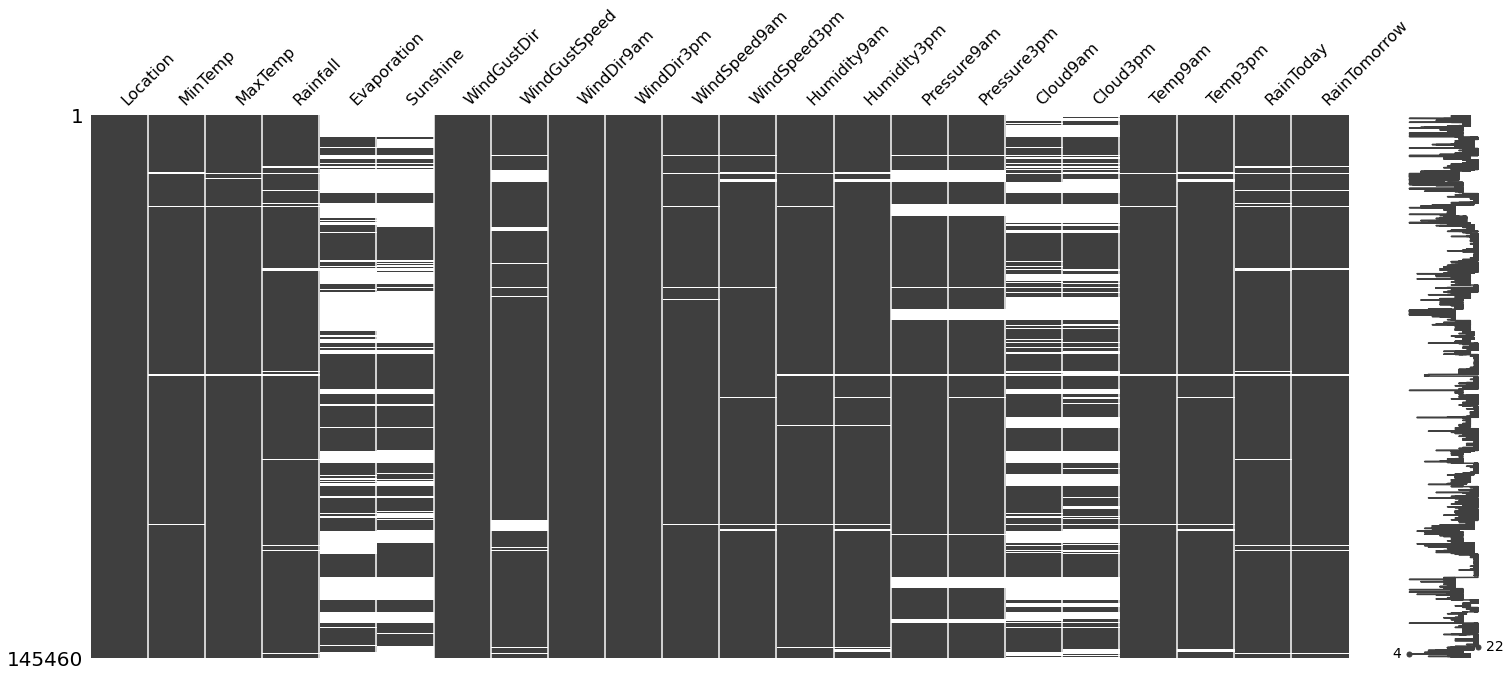

In [ ]:
msno.matrix(rain)

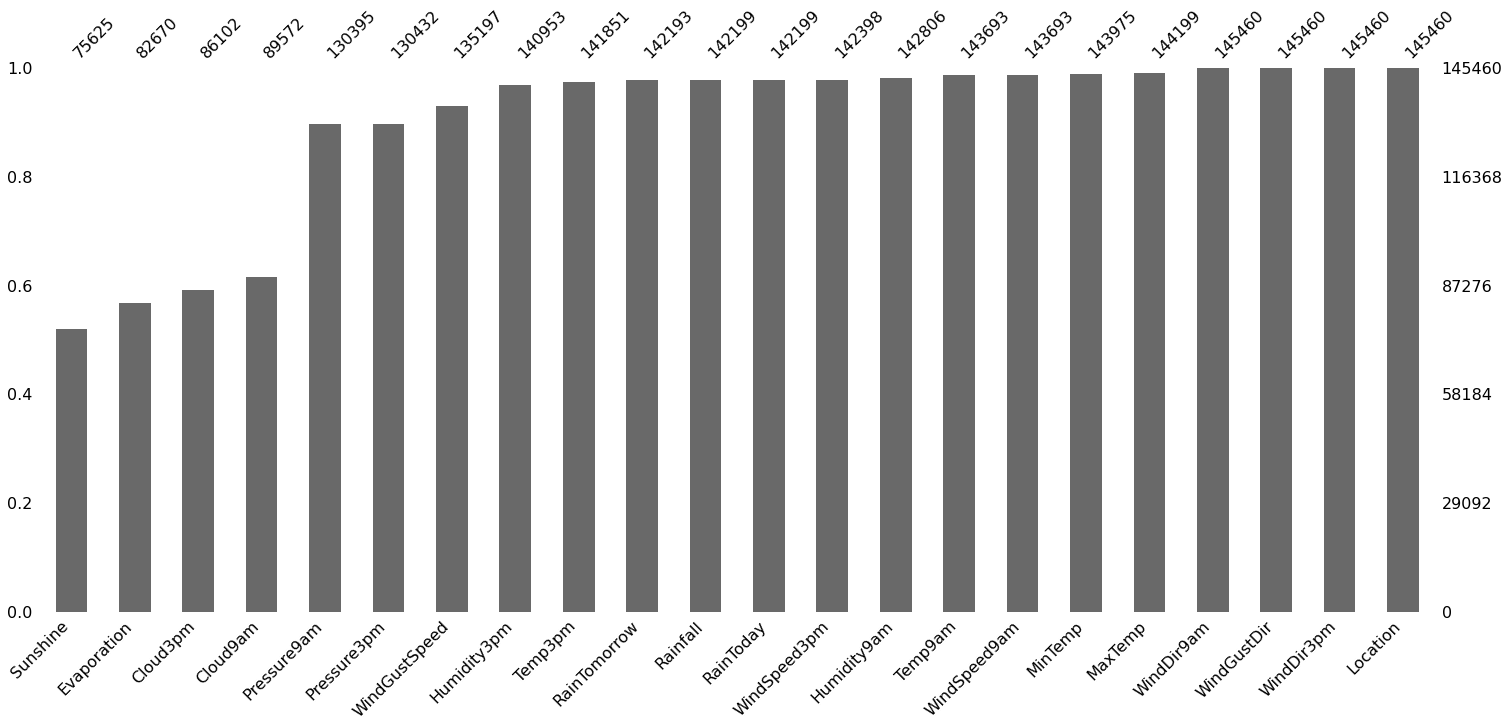

In [ ]:
msno.bar(rain, sort='ascending')

In [ ]:
(rain.isnull().sum()/len(rain))*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       0.000000
WindGustSpeed     7.055548
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [ ]:
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [ ]:
(rain.isnull().sum()/len(rain))*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

##**Remove Outlier**

In [ ]:
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136653, 22)


##**Data Visualization and Coorelation**

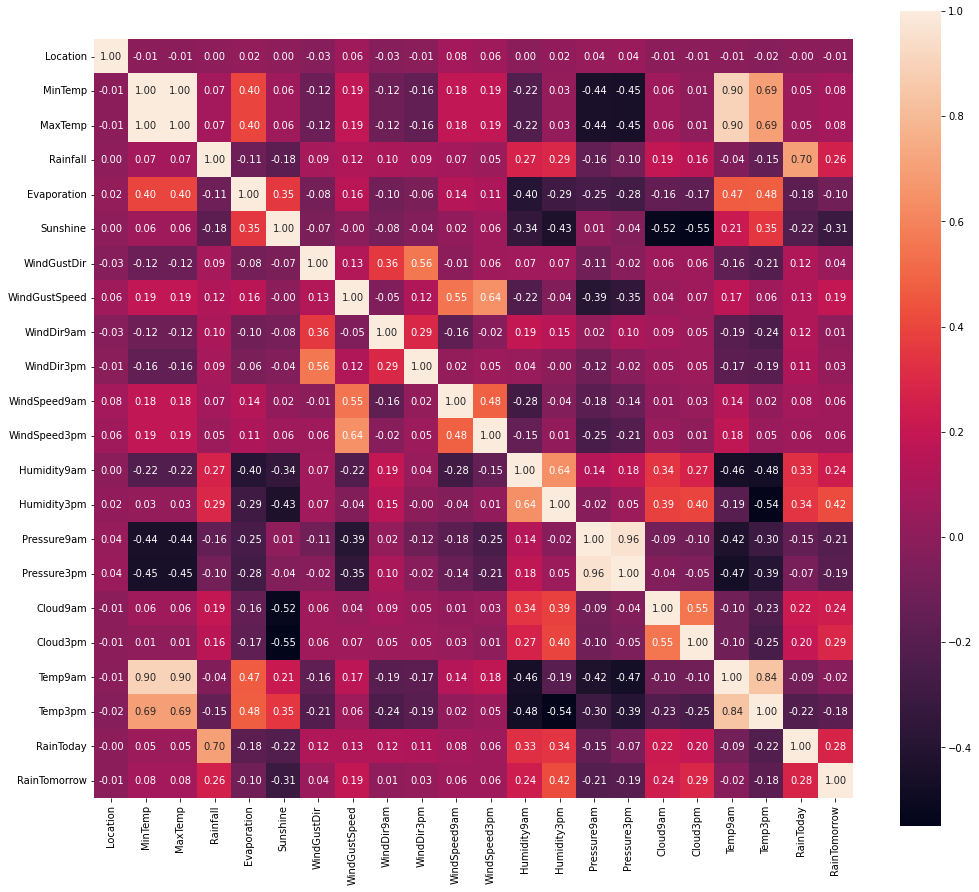

In [ ]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(rain.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

In [ ]:
rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#**Data Splitting**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
os = SMOTE()
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({0.0: 86876, 1.0: 86876})


**Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Logistic Regression is :  77.446855219348 %

F1 score for logistic regression is : 58.09083491977156 %


**Guassian Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  76.95291061432073 %

F1 score for Gaussian Naive Bayes is : 55.65645899331221 %


**Bernoulli Naive Bayes**

In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  70.4291829790348 %


**Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  84.36207968972961 %


**Decision Tree**

In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
predicted = model.predict(x_test)
print("The accuracy of Decision Tree is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Decision Tree is :  77.24195967948484 %


**Support Vector Machine**

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train,y_train)
predicted = model.predict(x_test)
print("The accuracy of Decision Tree is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Decision Tree is :  81.44231824667959 %


**Non Linear Support Vector Machine**

In [ ]:
model = SVC(kernel='rbf')
model.fit(x_train,y_train)
predicted = model.predict(x_test)
print("The accuracy of Decision Tree is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Decision Tree is :  77.86396399692657 %


#**Bangladesh Dataset**

In [3]:
rainBd = pd.read_csv('BD.csv')

NameError: ignored

In [ ]:
rainBd.head()

In [ ]:
rainBd.shape

In [ ]:
rainBd.nunique()

In [ ]:
rainBd=rainBd.drop(['StationIndex','Year','Month','Day'],axis=1)
rainBd.columns

In [ ]:
# rainBd=rainBd.drop(['Station'],axis=1)
le = preprocessing.LabelEncoder()
rainBd['Station'] = le.fit_transform(rainBd['Station'])
rainBd['Date'] = le.fit_transform(rainBd['Date'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(rainBd.iloc[:,:-1], rainBd.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")